<a href="https://colab.research.google.com/github/vermamuskan/Explainable-Custom-CNN-Architecture-for-Land-Use-Classification-Using-Satellite-Images/blob/main/EuroSAT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import cv2 as cv
import pandas as pd
import os
import numpy as np
import imutils
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
#test
Dir2=r'/content/drive/MyDrive/SATset/data final/Test Data' 

#train
Dir1=r'/content/drive/MyDrive/SATset/data final/Train Data'
areas=[]  
for i in os.listdir(r'/content/drive/MyDrive/SATset/data final/Train Data'):
    areas.append(i)
print(areas)

['River', 'Pasture', 'SeaLake', 'Forest', 'Residential', 'Industrial', 'HerbaceousVegetation', 'PermanentCrop', 'Highway', 'AnnualCrop']


In [ ]:
newList = []
for i in range(0,10):
  newList.append([])
  for j in range(0,2):
    newList[i].append([])
for i in range (0,len(y_test)):
  if y_test1[i][0]==1 and y_pred[i]==0:
    newList[0][0].append(X_test[i])
  if y_test1[i][0]==1 and y_pred[i]!=0:
    newList[0][1].append(X_test[i])
  if y_test1[i][1]==1 and y_pred[i]==1:
    newList[1][0].append(X_test[i])
  if y_test1[i][1]==1 and y_pred[i]!=1:
    newList[1][1].append(X_test[i])  
  if y_test1[i][2]==1 and y_pred[i]==2:
    newList[2][0].append(X_test[i])
  if y_test1[i][2]==1 and y_pred[i]!=2:
    newList[2][1].append(X_test[i])  
  if y_test1[i][3]==1 and y_pred[i]==3:
    newList[3][0].append(X_test[i])
  if y_test1[i][3]==1 and y_pred[i]!=3:
    newList[3][1].append(X_test[i])  
  if y_test1[i][4]==1 and y_pred[i]==4:
    newList[4][0].append(X_test[i])
  if y_test1[i][4]==1 and y_pred[i]!=4:
    newList[4][1].append(X_test[i])
  if y_test1[i][5]==1 and y_pred[i]==5:
    newList[5][0].append(X_test[i])
  if y_test1[i][5]==1 and y_pred[i]!=5:
    newList[5][1].append(X_test[i])
  if y_test1[i][6]==1 and y_pred[i]==6:
    newList[6][0].append(X_test[i])
  if y_test1[i][6]==1 and y_pred[i]!=6:
    newList[6][1].append(X_test[i])  
  if y_test1[i][7]==1 and y_pred[i]==7:
    newList[7][0].append(X_test[i])
  if y_test1[i][7]==1 and y_pred[i]!=7:
    newList[7][1].append(X_test[i])  
  if y_test1[i][8]==1 and y_pred[i]==8:
    newList[8][0].append(X_test[i])
  if y_test1[i][8]==1 and y_pred[i]!=8:
    newList[8][1].append(X_test[i])  
  if y_test1[i][9]==1 and y_pred[i]==9:
    newList[9][0].append(X_test[i])
  if y_test1[i][9]==1 and y_pred[i]!=9:
    newList[9][1].append(X_test[i])

In [ ]:
from skimage.segmentation import mark_boundaries

for i in range(0,len(newList)):
  for j in range(0,2):
    newList[i][0][j] = newList[i][0][j][:,:,::-1]
    explanation = explainer.explain_instance(newList[i][0][j].astype('double'), model.predict,top_labels=10, hide_color=1, num_samples=1000)
    temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True,negative_only=False, num_features=20, hide_rest=True)
    temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True,negative_only=False, num_features=20, hide_rest=True)
# plt.imshow(img_array)

# plt.imshow(mark_boundaries(temp_1, mask_1))
# plt.imshow(mark_boundaries(temp_2, mask_2))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
    ax1.imshow(mark_boundaries(temp_1, mask_1))
    ax2.imshow(mark_boundaries(newList[i][0][j], mask_2))
# ax2.imshow(img_array)
    ax1.axis('off')
    ax2.axis('off') 
  for j in range(0,2):
    newList[i][1][j] = newList[i][1][j][:,:,::-1]
    explanation = explainer.explain_instance(newList[i][1][j].astype('double'), model.predict,top_labels=10, hide_color=1, num_samples=1000)
    temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True,negative_only=False, num_features=20, hide_rest=True)
    temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True,negative_only=False, num_features=20, hide_rest=True)
# plt.imshow(img_array)

# plt.imshow(mark_boundaries(temp_1, mask_1))
# plt.imshow(mark_boundaries(temp_2, mask_2))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
    ax1.imshow(mark_boundaries(temp_1, mask_1))
    ax2.imshow(mark_boundaries(newList[i][1][j], mask_2))
# ax2.imshow(img_array)
    ax1.axis('off')
    ax2.axis('off') 



In [ ]:
def prepare_Train():
    features = []
    labels=[]
    size = 64 , 64
    for l in areas:
        path = os.path.join(Dir1, l)
        label = areas.index(l)

        for j in os.listdir(path):
            img_p = os.path.join(path, j)
            img_array = cv.imread(img_p)
            # img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
            try:
              img_array = cv.resize(img_array, size)
            except:
              break
            img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
            features.append(img_array)
            labels.append(label)
        X_train = np.array(features)
        y_train = np.array(labels)

    return X_train,y_train

def prepare_Test():
    features = []
    labels=[]
    # size = 64 , 64
    for l in areas:
        path = os.path.join(Dir2, l)
        label = areas.index(l)

        for j in os.listdir(path):
            img_p = os.path.join(path, j)
            img_array = cv.imread(img_p)
            # img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
            # img_array = cv.resize(img_array, size)
            img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
            features.append(img_array)
            labels.append(label)
        X_test = np.array(features)
        y_test = np.array(labels)

    return X_test,y_test

X_train,y_train=prepare_Train()
X_test,y_test=prepare_Test()
arr = [0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(y_train)):
  arr[y_train[i]]+=1
for i in range(0,10):
  print(arr[i])



y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

print(y_train)
print(y_test)

print()
print()
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=12345)
# print(X_test)
print(y_train)



600
600
601
600
600
600
600
600
600
600
[0 0 0 ... 9 9 9]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5

In [ ]:
def prepare_Test1():
    features = []
    labels=[]
    size = 64 , 64
    for l in areas:
        path = os.path.join(Dir2, l)
        label = areas.index(l)

        for j in os.listdir(path):
            img_p = os.path.join(path, j)
            img_array = cv.imread(img_p)
            # img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
            img_array = cv.resize(img_array, size)
            img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
            features.append(img_array)
            labels.append(label)
        X_test = np.array(features)
        y_test = np.array(labels)

    return X_test,y_test

X_test,y_test=prepare_Test1()


In [ ]:
print(len(y_test))
arr = [0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(y_test)):
  arr[y_test[i]]+=1
for i in range(0,10):
  print(arr[i])


780
78
78
78
78
78
78
78
78
78
78


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
seed_value= 1621
   
  # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
  # 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
  # 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [ ]:
# Sir waala model
def create_model():
  model = Sequential()
  model.add(Conv2D(1024,kernel_size=[3,3],padding='same', input_shape=(64,64,3), activation='relu'))  # first hidden layer
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(512,kernel_size=[3,3],padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(256,kernel_size=[3,3],padding='same', activation='relu'))  # first hidden layer
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(256,kernel_size=[3,3],padding='same', activation='swish'))  # first hidden layer
  model.add(MaxPooling2D(pool_size=[2,2]))

  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dropout(0.4))

  model.add(Dense(1024, activation='relu',kernel_regularizer= regularizers.l2(0.01)))
  model.add(Dense(512, activation='relu',kernel_regularizer= regularizers.l2(0.01)))
  model.add(Dense(256, activation='relu',kernel_regularizer= regularizers.l2(0.01)))
  # model.add(Dropout(0.3))  
  model.add(Dense(128, activation='relu'))  
  model.add(Dense(10, activation='softmax'))   # output layer
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model
model=create_model()
  # 5. For layers that introduce randomness like dropout, make sure to set seed values 
#model.add(Dropout(0.25, seed=seed_value))

In [ ]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'navy'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'white'
color_map[MaxPooling2D]['fill'] = 'cyan'
color_map[Dense]['fill'] = 'purple'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, color_map=color_map)

In [ ]:
from keras.utils import plot_model
from keras.applications.resnet50 import ResNet50
import numpy as np

#model = model(weights='imagenet')
plot_model(model, to_file='model.png')

In [ ]:
H = model.fit(X_train, y_train1, validation_split=0.1, epochs=200, batch_size=32, verbose=1)
_, accuracy = model.evaluate(X_test, y_test1, verbose=0)
print(accuracy)

Epoch 1/200
169/169 [==============================] - 62s 179ms/step - loss: 5.4989 - accuracy: 0.2522 - val_loss: 9.4403 - val_accuracy: 0.0000e+00
Epoch 2/200
169/169 [==============================] - 26s 152ms/step - loss: 1.7363 - accuracy: 0.3472 - val_loss: 10.5112 - val_accuracy: 0.0000e+00
Epoch 3/200
169/169 [==============================] - 26s 151ms/step - loss: 1.5441 - accuracy: 0.4019 - val_loss: 10.7234 - val_accuracy: 0.0000e+00
Epoch 4/200
169/169 [==============================] - 25s 150ms/step - loss: 1.4602 - accuracy: 0.4300 - val_loss: 9.3812 - val_accuracy: 0.0000e+00
Epoch 5/200
169/169 [==============================] - 25s 150ms/step - loss: 1.3725 - accuracy: 0.4739 - val_loss: 9.8644 - val_accuracy: 0.0000e+00
Epoch 6/200
169/169 [==============================] - 25s 149ms/step - loss: 1.3746 - accuracy: 0.4746 - val_loss: 8.3007 - val_accuracy: 0.0000e+00
Epoch 7/200
169/169 [==============================] - 25s 149ms/step - loss: 1.3916 - accuracy: 0

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#H = grid_result
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 49,  18,   1,   1,   0,   0,   0,   2,   7,   0],
       [  1,  75,   0,   0,   0,   0,   2,   0,   0,   0],
       [  1,   0,  63,   1,   0,   0,   0,   0,   0,   0],
       [  0,  10,   1,  67,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   2,  60,   7,   3,   2,   2,   0],
       [  2,   2,   0,   0,   0,  61,   0,   8,   2,   0],
       [  4,  11,   1,   2,   0,   1,  41,  16,   2,   0],
       [  1,  11,   0,   0,   0,   2,   1, 103,   3,   0],
       [  8,   7,   0,   0,   0,   2,   1,   9,  51,   0],
       [ 17,  25,   4,   0,   0,   0,   1,  19,  12,   0]])

9 (1)
6 
2
0
8 

In [ ]:
temp = model.predict(X_test)
print(temp)

In [ ]:
print(y_test1[image1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
#y_pred=model.predict_classes(X_test)
image1 = 0
temp = model.predict(X_test)
river = 0

y_pred = []
for i in range(0,len(temp)):
  maxm = 0.0
  lbl = 0
  for j in range(0,len(temp[i])):
    if maxm < temp[i][j]:
      lbl = j
      maxm=temp[i][j]
  y_pred.append(lbl)
  if y_test1[i][9] == 1 and lbl == 0:
    image1 = i  
  if y_test1[i][0] == 1 and lbl == 0:
    river = i
  #print(lbl,maxm)
  
figure = plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(areas))
plt.xticks(tick_marks, areas, rotation=45)
plt.yticks(tick_marks, areas)

In [ ]:
# our model
def create_model():
  model = Sequential()
  model.add(Conv2D(32,kernel_size=[3,3],padding='same', input_shape=(64,64,3), activation='relu'))  # first hidden layer
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(64,kernel_size=[3,3],padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(128,kernel_size=[3,3],padding='same', activation='relu'))  # first hidden layer
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(256,kernel_size=[3,3],padding='same', activation='swish'))  # first hidden layer
  model.add(MaxPooling2D(pool_size=[2,2]))


  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dropout(0.7))

  # model.add(Dense(1024, activation='relu',kernel_regularizer= regularizers.l2(0.001)))
  model.add(Dense(512, activation='relu',kernel_regularizer= regularizers.l2(0.001)))
  model.add(Dropout(0.7))
  # model.add(Dense(256, activation='relu',kernel_regularizer= regularizers.l2(0.001)))
    
  model.add(Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001)))   # output layer
  model.add(Dense(10, activation='softmax'))   # output layer

  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

  return model
model=create_model()

In [ ]:
print(y_train1)
v=str(y_train)
print(v)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0 0 0 ... 9 9 9]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)         2

In [ ]:
pip install git+https://github.com/paulgavrikov/visualkeras


  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-0jd04ro6
  Running command git clone -q https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-0jd04ro6
     |████████████████████████████████| 795 kB 5.4 MB/s 
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=12975 sha256=e737b3e8aa89583ca1f71475c0e6b5f0403d10138ea0f31ba4484c0bb1acbd18
  Stored in directory: /tmp/pip-ephem-wheel-cache-f4ve40m7/wheels/b8/3b/cf/30a062e766188d5fe50abf3d461720943b7d09906e3d261a94
Successfully built visualkeras


In [ ]:
import visualkeras
visualkeras.graph_view(model)

In [ ]:
H = model.fit(X_train, y_train1, validation_split=0.1, epochs=100, batch_size=32, verbose=1)
_, accuracy = model.evaluate(X_test, y_test1, verbose=0)
print(accuracy)

Epoch 1/100
169/169 [==============================] - 36s 19ms/step - loss: 2.5646 - accuracy: 0.2544 - val_loss: 10.4171 - val_accuracy: 0.0017
Epoch 2/100
169/169 [==============================] - 2s 14ms/step - loss: 1.9810 - accuracy: 0.3693 - val_loss: 15.0176 - val_accuracy: 0.0000e+00
Epoch 3/100
169/169 [==============================] - 2s 14ms/step - loss: 1.7325 - accuracy: 0.4374 - val_loss: 26.8561 - val_accuracy: 0.0000e+00
Epoch 4/100
169/169 [==============================] - 2s 14ms/step - loss: 1.5467 - accuracy: 0.5148 - val_loss: 24.9477 - val_accuracy: 0.0000e+00
Epoch 5/100
169/169 [==============================] - 2s 14ms/step - loss: 1.3751 - accuracy: 0.5715 - val_loss: 49.6717 - val_accuracy: 0.0000e+00
Epoch 6/100
169/169 [==============================] - 2s 14ms/step - loss: 1.2883 - accuracy: 0.6004 - val_loss: 42.5204 - val_accuracy: 0.0000e+00
Epoch 7/100
169/169 [==============================] - 2s 14ms/step - loss: 1.2323 - accuracy: 0.6157 - val_l

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#H = grid_result
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)         2

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
y_pred=model.predict_classes(X_test)
figure = plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(areas))
plt.xticks(tick_marks, areas, rotation=45)
plt.yticks(tick_marks, areas)

One vs All

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(32,kernel_size=[3,3],padding='same', input_shape=(64,64,3), activation='relu'))  # first hidden layer
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(64,kernel_size=[3,3],padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(128,kernel_size=[3,3],padding='same', activation='relu'))  # first hidden layer
  model.add(MaxPooling2D(pool_size=[3,3]))

  model.add(Conv2D(256,kernel_size=[3,3],padding='same', activation='swish'))  # first hidden layer
  model.add(MaxPooling2D(pool_size=[2,2]))


  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dropout(0.7))

  model.add(Dense(1024, activation='relu',kernel_regularizer= regularizers.l2(0.001)))
  model.add(Dense(512, activation='relu',kernel_regularizer= regularizers.l2(0.001)))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu',kernel_regularizer= regularizers.l2(0.001)))
  model.add(Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001)))   # output layer
  model.add(Dense(1, activation='sigmoid'))   # output layer
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

  return model

Epoch 1/100
80/80 [==============================] - 3s 24ms/step - loss: 1.6429 - accuracy: 0.8658 - val_loss: 1.3095 - val_accuracy: 1.0000
Epoch 2/100
80/80 [==============================] - 2s 20ms/step - loss: 1.0128 - accuracy: 0.8925 - val_loss: 1.2326 - val_accuracy: 0.5379
Epoch 3/100
80/80 [==============================] - 2s 20ms/step - loss: 0.6640 - accuracy: 0.9277 - val_loss: 0.9427 - val_accuracy: 0.7027
Epoch 4/100
80/80 [==============================] - 2s 20ms/step - loss: 0.4606 - accuracy: 0.9421 - val_loss: 1.7743 - val_accuracy: 0.4205
Epoch 5/100
80/80 [==============================] - 2s 20ms/step - loss: 0.3462 - accuracy: 0.9506 - val_loss: 0.1709 - val_accuracy: 1.0000
Epoch 6/100
80/80 [==============================] - 2s 20ms/step - loss: 0.2822 - accuracy: 0.9494 - val_loss: 0.2046 - val_accuracy: 0.9667
Epoch 7/100
80/80 [==============================] - 2s 20ms/step - loss: 0.2387 - accuracy: 0.9535 - val_loss: 0.9318 - val_accuracy: 0.4505
Epoch 

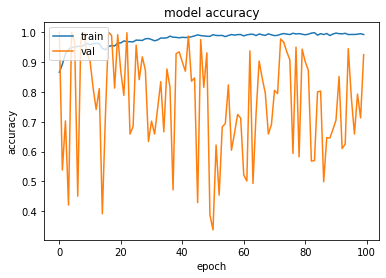

26 688
780
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       702
           1       0.65      0.33      0.44        78

    accuracy                           0.92       780
   macro avg       0.79      0.66      0.70       780
weighted avg       0.90      0.92      0.90       780

[[688  14]
 [ 52  26]]
Epoch 1/100
80/80 [==============================] - 3s 26ms/step - loss: 1.4768 - accuracy: 0.8748 - val_loss: 0.7596 - val_accuracy: 1.0000
Epoch 2/100
80/80 [==============================] - 2s 20ms/step - loss: 0.7915 - accuracy: 0.8750 - val_loss: 0.3908 - val_accuracy: 1.0000
Epoch 3/100
80/80 [==============================] - 2s 20ms/step - loss: 0.5065 - accuracy: 0.8808 - val_loss: 0.2634 - val_accuracy: 0.9925
Epoch 4/100
80/80 [==============================] - 2s 20ms/step - loss: 0.3764 - accuracy: 0.8906 - val_loss: 0.2230 - val_accuracy: 0.9592
Epoch 5/100
80/80 [==============================] - 2s 20ms/step - los

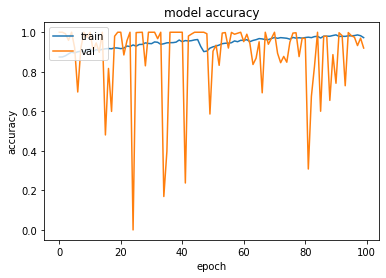

72 624
780
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       702
           1       0.48      0.92      0.63        78

    accuracy                           0.89       780
   macro avg       0.74      0.91      0.78       780
weighted avg       0.94      0.89      0.91       780

[[624  78]
 [  6  72]]
Epoch 1/100
80/80 [==============================] - 3s 26ms/step - loss: 1.6679 - accuracy: 0.8662 - val_loss: 1.0376 - val_accuracy: 1.0000
Epoch 2/100
80/80 [==============================] - 2s 20ms/step - loss: 1.0392 - accuracy: 0.8981 - val_loss: 0.7658 - val_accuracy: 0.9459
Epoch 3/100
80/80 [==============================] - 2s 20ms/step - loss: 0.7161 - accuracy: 0.9279 - val_loss: 0.4294 - val_accuracy: 1.0000
Epoch 4/100
80/80 [==============================] - 2s 20ms/step - loss: 0.5170 - accuracy: 0.9388 - val_loss: 0.2920 - val_accuracy: 1.0000
Epoch 5/100
80/80 [==============================] - 2s 20ms/step - los

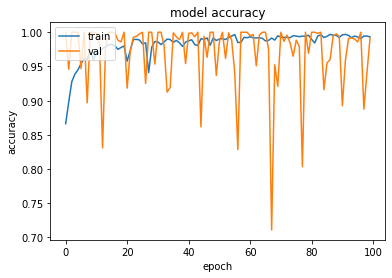

66 700
780
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       702
           1       0.97      0.85      0.90        78

    accuracy                           0.98       780
   macro avg       0.98      0.92      0.95       780
weighted avg       0.98      0.98      0.98       780

[[700   2]
 [ 12  66]]
Epoch 1/100
80/80 [==============================] - 3s 24ms/step - loss: 1.6083 - accuracy: 0.8629 - val_loss: 1.0131 - val_accuracy: 1.0000
Epoch 2/100
80/80 [==============================] - 2s 20ms/step - loss: 1.0558 - accuracy: 0.8721 - val_loss: 1.2185 - val_accuracy: 1.0000
Epoch 3/100
80/80 [==============================] - 2s 21ms/step - loss: 0.7529 - accuracy: 0.8742 - val_loss: 0.4206 - val_accuracy: 1.0000
Epoch 4/100
80/80 [==============================] - 2s 20ms/step - loss: 0.5631 - accuracy: 0.8694 - val_loss: 0.8725 - val_accuracy: 1.0000
Epoch 5/100
80/80 [==============================] - 2s 21ms/step - los

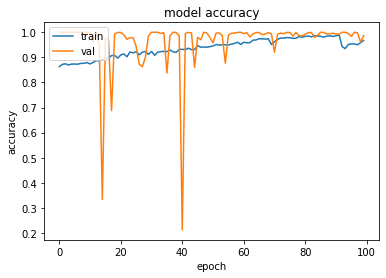

75 674
780
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       702
           1       0.73      0.96      0.83        78

    accuracy                           0.96       780
   macro avg       0.86      0.96      0.90       780
weighted avg       0.97      0.96      0.96       780

[[674  28]
 [  3  75]]
Epoch 1/100
80/80 [==============================] - 3s 26ms/step - loss: 1.5218 - accuracy: 0.8737 - val_loss: 0.9366 - val_accuracy: 0.9950
Epoch 2/100
80/80 [==============================] - 2s 21ms/step - loss: 0.8552 - accuracy: 0.9273 - val_loss: 0.5168 - val_accuracy: 1.0000
Epoch 3/100
80/80 [==============================] - 2s 21ms/step - loss: 0.5153 - accuracy: 0.9588 - val_loss: 0.3208 - val_accuracy: 1.0000
Epoch 4/100
80/80 [==============================] - 2s 21ms/step - loss: 0.3534 - accuracy: 0.9681 - val_loss: 0.2114 - val_accuracy: 0.9992
Epoch 5/100
80/80 [==============================] - 2s 20ms/step - los

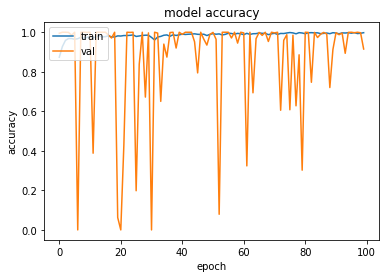

77 627
780
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       702
           1       0.51      0.99      0.67        78

    accuracy                           0.90       780
   macro avg       0.75      0.94      0.81       780
weighted avg       0.95      0.90      0.92       780

[[627  75]
 [  1  77]]
Epoch 1/100
80/80 [==============================] - 3s 26ms/step - loss: 1.5933 - accuracy: 0.8865 - val_loss: 1.9178 - val_accuracy: 0.4371
Epoch 2/100
80/80 [==============================] - 2s 21ms/step - loss: 1.0617 - accuracy: 0.9404 - val_loss: 0.8666 - val_accuracy: 0.9559
Epoch 3/100
80/80 [==============================] - 2s 21ms/step - loss: 0.7550 - accuracy: 0.9575 - val_loss: 0.8113 - val_accuracy: 0.8526
Epoch 4/100
80/80 [==============================] - 2s 21ms/step - loss: 0.5543 - accuracy: 0.9623 - val_loss: 1.2194 - val_accuracy: 0.6536
Epoch 5/100
80/80 [==============================] - 2s 21ms/step - los

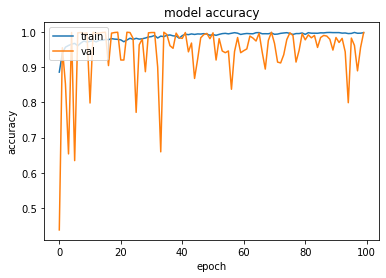

27 702
780
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       702
           1       1.00      0.35      0.51        78

    accuracy                           0.93       780
   macro avg       0.97      0.67      0.74       780
weighted avg       0.94      0.93      0.92       780

[[702   0]
 [ 51  27]]
Epoch 1/100
80/80 [==============================] - 3s 27ms/step - loss: 1.7000 - accuracy: 0.8667 - val_loss: 1.0759 - val_accuracy: 1.0000
Epoch 2/100
80/80 [==============================] - 2s 21ms/step - loss: 1.1145 - accuracy: 0.8746 - val_loss: 0.6615 - val_accuracy: 1.0000
Epoch 3/100
80/80 [==============================] - 2s 21ms/step - loss: 0.7753 - accuracy: 0.8829 - val_loss: 0.4528 - val_accuracy: 1.0000
Epoch 4/100
80/80 [==============================] - 2s 21ms/step - loss: 0.5883 - accuracy: 0.8844 - val_loss: 0.4000 - val_accuracy: 0.9958
Epoch 5/100
80/80 [==============================] - 2s 21ms/step - los

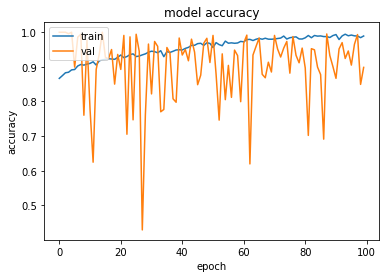

56 632
780
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       702
           1       0.44      0.72      0.55        78

    accuracy                           0.88       780
   macro avg       0.71      0.81      0.74       780
weighted avg       0.91      0.88      0.89       780

[[632  70]
 [ 22  56]]
Epoch 1/100
80/80 [==============================] - 3s 24ms/step - loss: 1.6364 - accuracy: 0.8673 - val_loss: 1.6920 - val_accuracy: 0.5037
Epoch 2/100
80/80 [==============================] - 2s 21ms/step - loss: 1.0572 - accuracy: 0.8873 - val_loss: 0.8439 - val_accuracy: 0.8243
Epoch 3/100
80/80 [==============================] - 2s 21ms/step - loss: 0.7230 - accuracy: 0.9102 - val_loss: 0.6012 - val_accuracy: 0.8734
Epoch 4/100
80/80 [==============================] - 2s 21ms/step - loss: 0.5358 - accuracy: 0.9069 - val_loss: 0.7453 - val_accuracy: 0.7211
Epoch 5/100
80/80 [==============================] - 2s 21ms/step - los

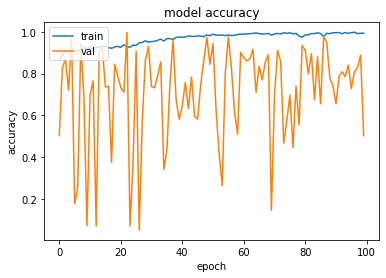

77 575
780
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       702
           1       0.38      0.99      0.55        78

    accuracy                           0.84       780
   macro avg       0.69      0.90      0.72       780
weighted avg       0.94      0.84      0.86       780

[[575 127]
 [  1  77]]
Epoch 1/100
80/80 [==============================] - 4s 28ms/step - loss: 1.0598 - accuracy: 0.9908 - val_loss: 14.9212 - val_accuracy: 0.5004
Epoch 2/100
80/80 [==============================] - 2s 21ms/step - loss: 0.3700 - accuracy: 1.0000 - val_loss: 6.0484 - val_accuracy: 0.5004
Epoch 3/100
80/80 [==============================] - 2s 21ms/step - loss: 0.1600 - accuracy: 1.0000 - val_loss: 5.5904 - val_accuracy: 0.5004
Epoch 4/100
80/80 [==============================] - 2s 22ms/step - loss: 0.0811 - accuracy: 1.0000 - val_loss: 5.2133 - val_accuracy: 0.5004
Epoch 5/100
80/80 [==============================] - 2s 21ms/step - lo

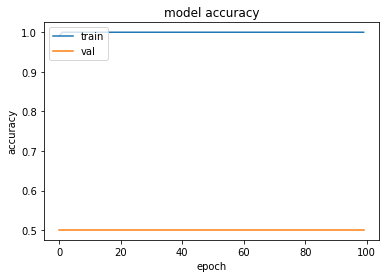

0 702
780
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       702
           1       0.00      0.00      0.00        78

    accuracy                           0.90       780
   macro avg       0.45      0.50      0.47       780
weighted avg       0.81      0.90      0.85       780

[[702   0]
 [ 78   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
80/80 [==============================] - 3s 28ms/step - loss: 1.1064 - accuracy: 0.9917 - val_loss: 21.3252 - val_accuracy: 0.5004
Epoch 2/100
80/80 [==============================] - 2s 22ms/step - loss: 0.4315 - accuracy: 1.0000 - val_loss: 6.0128 - val_accuracy: 0.5004
Epoch 3/100
80/80 [==============================] - 2s 21ms/step - loss: 0.2025 - accuracy: 1.0000 - val_loss: 6.5756 - val_accuracy: 0.5004
Epoch 4/100
80/80 [==============================] - 2s 21ms/step - loss: 0.1087 - accuracy: 1.0000 - val_loss: 6.3621 - val_accuracy: 0.5004
Epoch 5/100
80/80 [==============================] - 2s 21ms/step - loss: 0.0642 - accuracy: 1.0000 - val_loss: 5.0480 - val_accuracy: 0.5004
Epoch 6/100
80/80 [==============================] - 2s 21ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 4.4353 - val_accuracy: 0.5004
Epoch 7/100
80/80 [==============================] - 2s 22ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 4.3048 - val_accuracy: 0.5004
Epoch

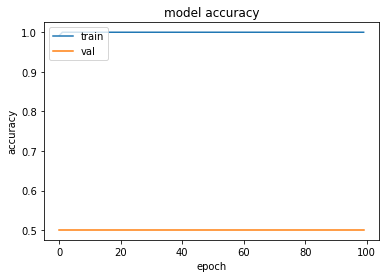

0 702
780
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       702
           1       0.00      0.00      0.00        78

    accuracy                           0.90       780
   macro avg       0.45      0.50      0.47       780
weighted avg       0.81      0.90      0.85       780

[[702   0]
 [ 78   0]]


In [ ]:
for j in range(0,10):

  labels1 = []
  for i in y_train:
    if i!=j:
      labels1.append(0)
    else:
      labels1.append(1)
  
  labels2 = []
  for i in y_test:
    if i!=j:
      labels2.append(0)
    else:
      labels2.append(1)

  #Y_train1=to_categorical(labels1,2)
  #Y_test1=to_categorical(labels2,2)
  labels1=np.array(labels1)
  labels2=np.array(labels2)
  # print(Y_test1)
  #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model = create_model()
  H = model.fit(X_train, labels1, validation_split = 0.2, epochs=100, batch_size=60, verbose=1)

  #graph
  #model1 = create_model()
  #model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #H = model1.fit(X_train, y_train,validation_split = 0.3, epochs=9, batch_size=60)

  #H = grid_result
  plt.plot(H.history['accuracy'])
  plt.plot(H.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  y_pred = model.predict(X_test)
  #rounded_labels=np.argmax(y_pred, axis=1)
  x1=0
  x0=0
  for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
      y_pred[i]=1
    else:
      y_pred[i]=0

    if y_pred[i]==labels2[i]:
      if y_pred[i]==1:
        x0+=1
      else:
        x1+=1

  print(x0,x1)
  #y_pred = (y_pred > 0.5) 
  print(len(y_pred))
  print(classification_report(labels2, y_pred, labels = [0,1] ))


  print(confusion_matrix(labels2, y_pred))

In [ ]:
pip install lime

     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=70f48401c60cd40855137984eb65df0f6e204edfe30d9d94e41aec955022e86f
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [ ]:
# X_test[river] = X_test[river][:,:,::-1]

explanation = explainer.explain_instance(X_test[river].astype('double'), model.predict,top_labels=10, hide_color=1, num_samples=1000)

# X_test[image1] = X_test[image1][:,:,::-1]

explanation1 = explainer.explain_instance(X_test[image1].astype('double'), model.predict,top_labels=10, hide_color=1, num_samples=1000)

# explanation1 = explainer.explain_instance(img_array1.astype('double'), model.predict,top_labels=10, hide_color=7, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(y_test1[river])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
size = 64 , 64
img_array = cv.imread(r'/content/drive/MyDrive/EuroSat/data final/Test Data/AnnualCrop/AnnualCrop_2442.jpg')
img_array = cv.resize(img_array, size)
img_array1 = cv.imread(r'/content/drive/MyDrive/EuroSat/data final/Test Data/AnnualCrop/AnnualCrop_2415.jpg')
img_array1 = cv.resize(img_array1, size)

# img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 63.5, 63.5, -0.5)

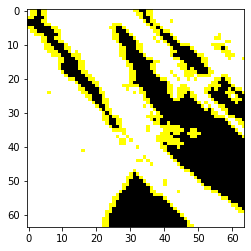

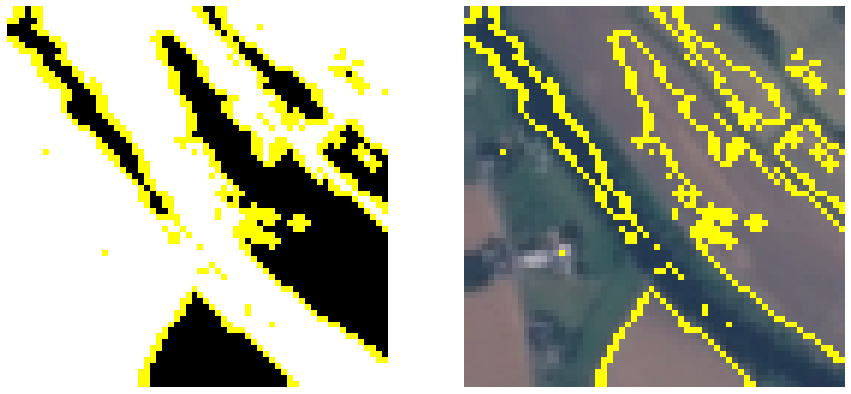

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True,negative_only=False, num_features=20, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True,negative_only=False, num_features=20, hide_rest=True)
# plt.imshow(img_array)

# plt.imshow(mark_boundaries(temp_1, mask_1))
# plt.imshow(mark_boundaries(temp_2, mask_2))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(X_test[river], mask_2))
# ax2.imshow(img_array)
ax1.axis('off')
ax2.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 63.5, 63.5, -0.5)

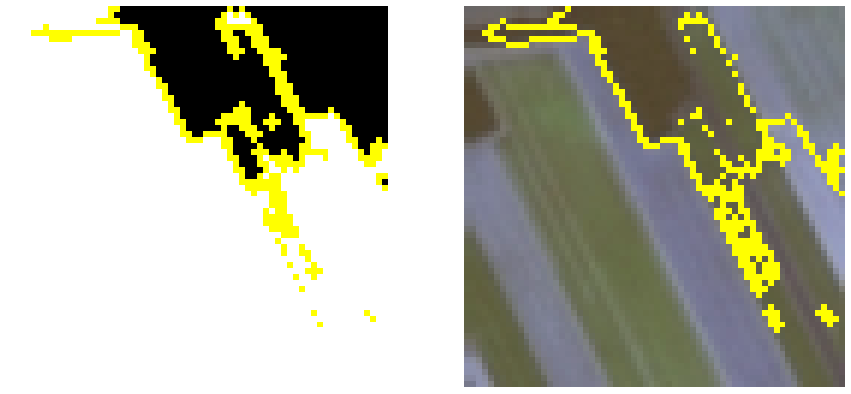

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation1.get_image_and_mask(explanation.top_labels[9], positive_only = True,negative_only=False, num_features=20, hide_rest=True)
temp_2, mask_2 = explanation1.get_image_and_mask(explanation.top_labels[9], positive_only = False,negative_only=True, num_features=10, hide_rest=False)
# plt.imshow(img_array)

# plt.imshow(mark_boundaries(img_array, mask_2))
# plt.imshow(mark_boundaries(temp_2, mask_2))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(X_test[image1], mask_2))
# ax2.imshow(img_array)
ax1.axis('off')
ax2.axis('off')

In [ ]:
explanation.top_labels[2]

1

In [ ]:
from tensorflow import keras
reconstructed_model = keras.models.load_model("my_model")